In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

In [ ]:
data = pd.read_csv("/content/HR-Employee-Attrition (1).csv")

# EDA

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
for column in data.columns:
  unique_values = data[column].unique()
  print(f"{column}: {unique_values}")
  print()

Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Attrition: ['Yes' 'No']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  9

In [ ]:
data = data.drop(columns=['DailyRate','EmployeeCount','EmployeeNumber','MonthlyRate','Over18','StandardHours'])

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
for column in data.columns:
  if data[column].dtype == "object":
    # Create a confusion matrix for each categorical attribute
    confusion_matrix = pd.crosstab(data[column], data["Attrition"])
    print(f"Confusion matrix for {column}:\n{confusion_matrix}")
    print()

Confusion matrix for Attrition:
Attrition    No  Yes
Attrition           
No         1233    0
Yes           0  237

Confusion matrix for BusinessTravel:
Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

Confusion matrix for Department:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92

Confusion matrix for EducationField:
Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32

Confusion matrix for Gender:
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150

Confusion matrix for JobRole:
Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Huma

## explanation -

**Education -**
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

---

**EnvironmentSatisfaction -**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

---

**JobInvolvement -**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'


---


**JobSatisfaction -**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'


---


**PerformanceRating -**
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'


---


**RelationshipSatisfaction -**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'


---


**WorkLifeBalance -**
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## Average -
i. age

ii.monthly income


In [ ]:
average_age = round(data['Age'].mean(),2)
print(f"Average age: {average_age}")

Average age: 36.92


In [ ]:
average_income = round(data['MonthlyIncome'].mean(),2)
print(f"Average Income: {average_income}")

Average Income: 6502.93


<ipython-input-11-07d9de3f992e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm')


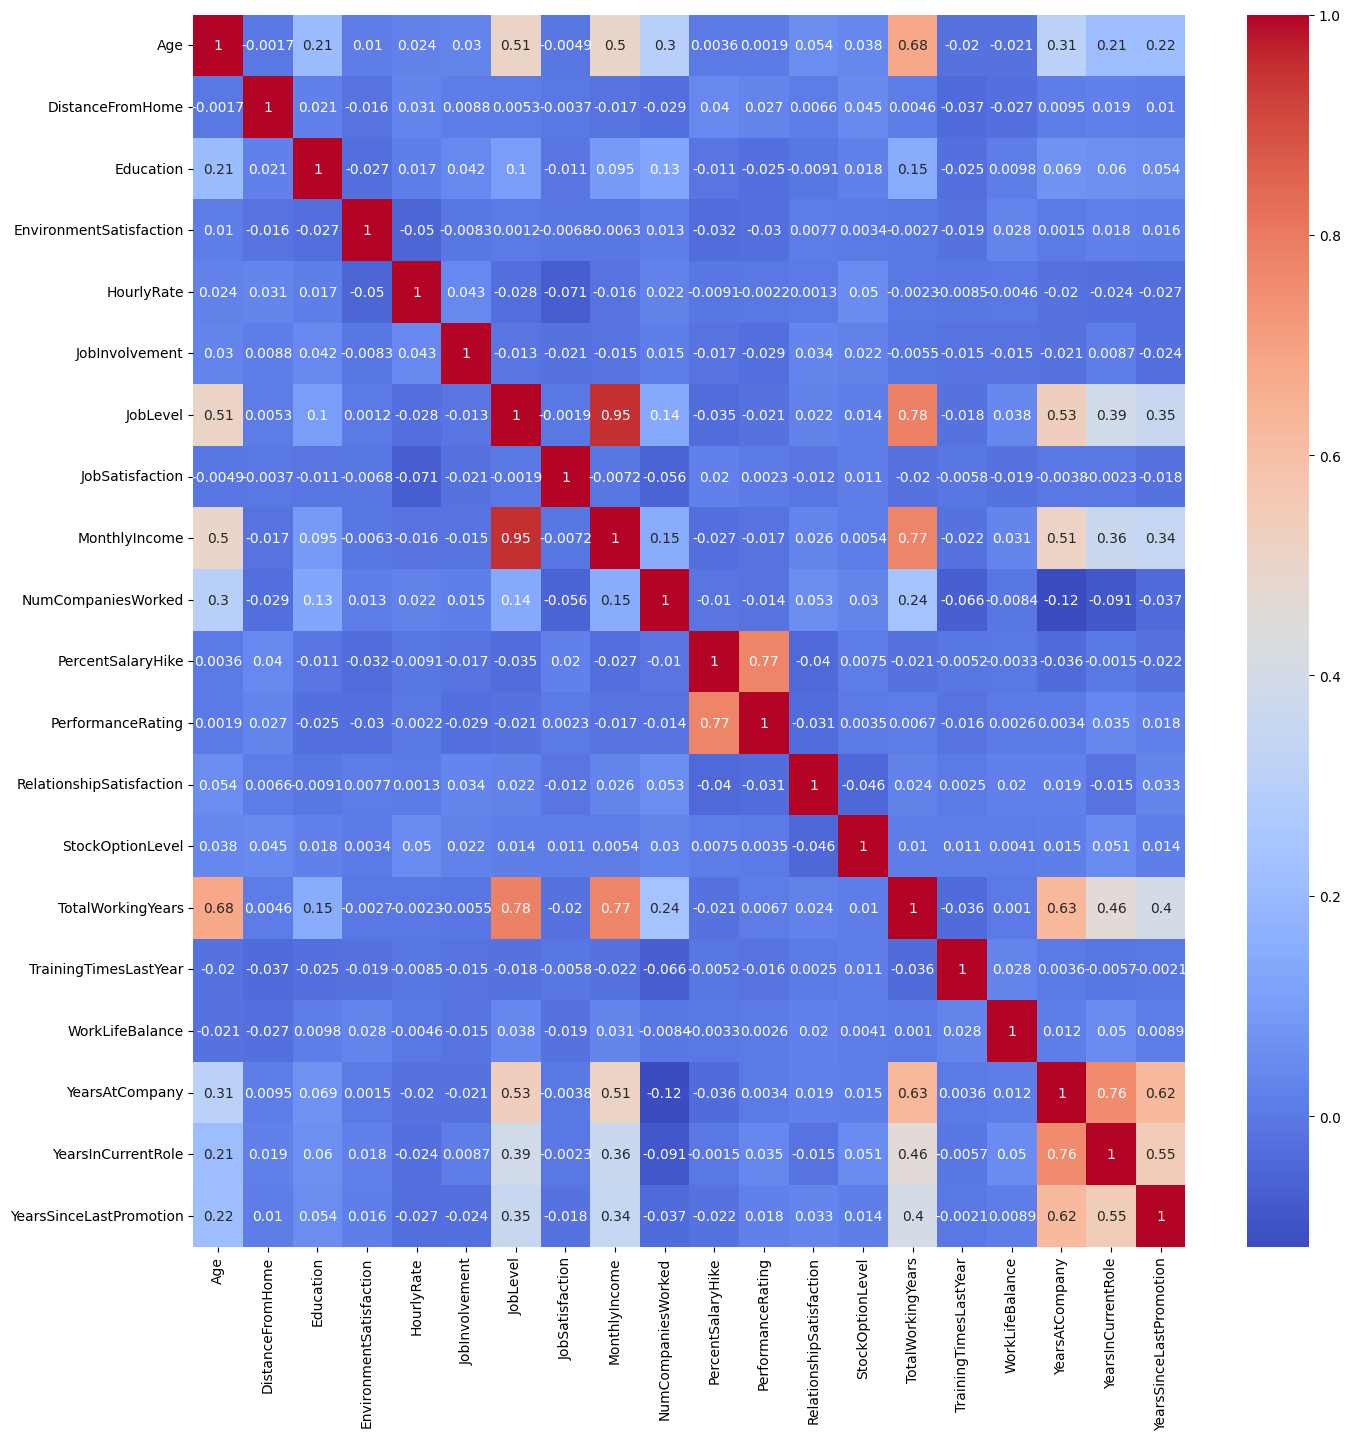

In [ ]:
columns = data.columns[:-1]
plt.figure(figsize=(16, 16))
sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm')
plt.show()

# Attritions


In [ ]:
total_employees = len(data)

In [ ]:
# Attrition based on gender
total_employees = data.shape[0]
female_employees = len(data[data['Gender'] == 'Female'])
male_employees = len(data[data['Gender'] == 'Male'])

female_attrition = len(data[(data['Gender'] == 'Female') & (data['Attrition'] == 'Yes')])
male_attrition = len(data[(data['Gender'] == 'Male') & (data['Attrition'] == 'Yes')])

female_attrition_rate = (female_attrition / total_employees) * 100
male_attrition_rate = (male_attrition / total_employees) * 100

print(f"Female attrition rate: {female_attrition_rate:.2f}%")
print(f"Male attrition rate: {male_attrition_rate:.2f}%")


Female attrition rate: 5.92%
Male attrition rate: 10.20%


In [ ]:
# Attrition based on Job Role
job_roles = data['JobRole'].unique()
for role in job_roles:
  attrition_count = len(data[(data['JobRole'] == role) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{role}: {attrition_rate:.2f}%")

Sales Executive: 3.88%
Research Scientist: 3.20%
Laboratory Technician: 4.22%
Manufacturing Director: 0.68%
Healthcare Representative: 0.61%
Manager: 0.34%
Sales Representative: 2.24%
Research Director: 0.14%
Human Resources: 0.82%


**Education -**
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

In [ ]:
# Attrition based on education field

education_fields = []
for i in range(len(data)):
  education_field = data['EducationField'][i]
  education_fields.append(education_field)

data['EducationField'] = education_fields

education_fields = data['EducationField'].unique()
education_fields.sort()
for field in education_fields:
  attrition_count = len(data[(data['EducationField'] == field) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{field}: {attrition_rate:.2f}%")


Human Resources: 0.48%
Life Sciences: 6.05%
Marketing: 2.38%
Medical: 4.29%
Other: 0.75%
Technical Degree: 2.18%


In [ ]:
# Attrition based on YearsSinceLastPromotion

bins = [0, 5, 10, 15]
labels = ['0-5', '5-10', '10-15']

data['YearsSinceLastPromotion_intervals'] = pd.cut(data['YearsSinceLastPromotion'], bins=bins, labels=labels)

for interval in labels:
  attrition_count = len(data[(data['YearsSinceLastPromotion_intervals'] == interval) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{interval}: {attrition_rate:.2f}%")


0-5: 6.26%
5-10: 1.84%
10-15: 0.54%


In [ ]:
# Attrition based on Department
departments = data['Department'].unique()
for department in departments:
  attrition_count = len(data[(data['Department'] == department) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{department}: {attrition_rate:.2f}%")


Sales: 6.26%
Research & Development: 9.05%
Human Resources: 0.82%


In [ ]:
# attrition based on BusinessTravel

business_travel_options = data['BusinessTravel'].unique()
for option in business_travel_options:
  attrition_count = len(data[(data['BusinessTravel'] == option) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{option}: {attrition_rate:.2f}%")


Travel_Rarely: 10.61%
Travel_Frequently: 4.69%
Non-Travel: 0.82%


**JobSatisfaction -**
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

In [ ]:
#attrition based on JobSatisfaction

job_satisfaction_options = data['JobSatisfaction'].unique()
job_satisfaction_options.sort()
for option in job_satisfaction_options:
  attrition_count = len(data[(data['JobSatisfaction'] == option) & (data['Attrition'] == 'Yes')])
  attrition_rate = (attrition_count / total_employees) * 100
  print(f"{option}: {attrition_rate:.2f}%")


1: 4.49%
2: 3.13%
3: 4.97%
4: 3.54%


# Hypothesis Testing -


1. Age and Attrition Rate
2. Education Level and Job Satisfaction
3. average daily rate paid and gender
4. monthly income and performance rating
5. Marital status and work life balance
6. Number of companies and years since last promotion
7. Department and Job Satisfaction
8. Years at company and attrition rate
9. Employee's Job Level and attrition Rate

## Tests Used
T test -
The t-test compares two groups to see if their differences are likely due to a real effect or just random chance. It gives a score (t-score) and a p-value, indicating the likelihood of chance causing the observed differences. If the p-value is small (usually less than 0.05), we can trust the differences are meaningful; if it's large, differences might just be random.


---
ANOVA -
ANOVA (Analysis of Variance) compares the means of multiple groups to determine if there's a significant difference between them. It calculates an F-statistic and a p-value, where a small p-value suggests the observed differences are likely not due to chance, indicating a significant effect. If the p-value is large, it suggests that any differences between groups are likely due to random variation.

In [ ]:
# H0 - There is no significant relationship between employee age and attrition rate.
# H1 - There is a significant relationship between employee age and attrition rate.
import statsmodels.api as sm
alpha = 0.05
# Create a binary variable for attrition
data['Attrition_binary'] = (data['Attrition'] == 'Yes').astype(int)

# Create a model with age as the independent variable and attrition_binary as the dependent variable
model = sm.OLS(data['Attrition_binary'], sm.add_constant(data['Age'])).fit()
print(model.summary())
# Get the p-value for the age coefficient
p_value = model.pvalues['Age']

print(p_value)

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant relationship between employee age and attrition rate.")
else:
  print("Fail to reject the null hypothesis. There is no significant relationship between employee age and attrition rate.")


                            OLS Regression Results                            
Dep. Variable:       Attrition_binary   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     38.18
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           8.36e-10
Time:                        15:50:26   Log-Likelihood:                -596.40
No. Observations:                1470   AIC:                             1197.
Df Residuals:                    1468   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3979      0.039     10.083      0.0

The p-value of approximately 8.36e-10 is significantly smaller than the significance level of 0.05, indicating strong evidence to reject the null hypothesis. Therefore, it can be concluded that there is a significant relationship between employee age and attrition rate.

In [ ]:
# H0: The education level of an employee has no significant impact on their job satisfaction.
# H1: The education level of an employee has a significant impact on their job satisfaction.
import scipy.stats as stats
alpha = 0.05

education_level = data["Education"]
job_satisfaction = data["JobSatisfaction"]

# Group the data by education level and calculate the mean job satisfaction for each level
grouped_data = data.groupby("Education")["JobSatisfaction"].mean()

print(grouped_data)
f_statistic, p_value = stats.f_oneway(*[job_satisfaction[education_level == level] for level in grouped_data.index])

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. The education level of an employee has a significant impact on their job satisfaction.")
else:
    print("Fail to reject the null hypothesis. The education level of an employee has no significant impact on their job satisfaction.")


Education
1    2.800000
2    2.769504
3    2.652098
4    2.786432
5    2.666667
Name: JobSatisfaction, dtype: float64
0.2774757289336202
Fail to reject the null hypothesis. The education level of an employee has no significant impact on their job satisfaction.


The p-value of 0.277 suggests that there is insufficient evidence to conclude that differences in education level significantly influence job satisfaction among employees, meaning the observed data is reasonably consistent with the null hypothesis that education level has no significant impact on job satisfaction.

In [ ]:
# H0: There is no significant difference in the average daily rate paid to employees based on their gender.
# H1: There is a significant difference in the average daily rate paid to employees based on their gender.

alpha = 0.05

# Extract relevant data from the dataframe
gender_data = data["Gender"]
daily_rate_data = data["DailyRate"]

# Group the data by gender and calculate the mean daily rate for each group
grouped_data = data.groupby("Gender")["DailyRate"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[daily_rate_data[gender_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average daily rate paid to employees based on their gender.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average daily rate paid to employees based on their gender.")


0.6535493969020572
Fail to reject the null hypothesis. There is no significant difference in the average daily rate paid to employees based on their gender.


The p-value of 0.654 suggests that there is insufficient evidence to conclude a significant difference in the average daily rate paid to employees based on their gender, thus failing to reject the null hypothesis.

In [ ]:
# H0: The monthly income of employees is not significantly related to their performance rating.
# H1: The monthly income of employees is significantly related to their performance rating.

# Set the significance level
alpha = 0.05

# Extract relevant data from the dataframe
income_data = data["MonthlyIncome"]
performance_rating_data = data["PerformanceRating"]

# Group the data by performance rating and calculate the mean monthly income for each group
grouped_data = data.groupby("PerformanceRating")["MonthlyIncome"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[income_data[performance_rating_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The monthly income of employees is significantly related to their performance rating.")
else:
    print("Fail to reject the null hypothesis. The monthly income of employees is not significantly related to their performance rating.")


0.5118976688640235
Fail to reject the null hypothesis. The monthly income of employees is not significantly related to their performance rating.


With a p-value of 0.512, there is insufficient evidence to reject the null hypothesis, indicating that the monthly income of employees is not significantly related to their performance rating.

In [ ]:
# H0: The marital status of employees has no significant effect on their work-life balance.
# H1: The marital status of employees has a significant effect on their work-life balance.

# Set the significance level
alpha = 0.05

# Extract relevant data from the dataframe
marital_status_data = data["MaritalStatus"]
work_life_balance_data = data["WorkLifeBalance"]

# Group the data by marital status and calculate the mean work-life balance for each group
grouped_data = data.groupby("MaritalStatus")["WorkLifeBalance"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[work_life_balance_data[marital_status_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The marital status of employees has a significant effect on their work-life balance.")
else:
    print("Fail to reject the null hypothesis. The marital status of employees has no significant effect on their work-life balance.")


0.8399884844315466
Fail to reject the null hypothesis. The marital status of employees has no significant effect on their work-life balance.


With a p-value of approximately 0.840, we fail to reject the null hypothesis, indicating that there is no significant effect of employees' marital status on their work-life balance. In other words, the data does not provide enough evidence to conclude that being married or single significantly influences the perception of work-life balance among employees.

In [ ]:
# H0: The number of companies an employee has worked for in the past is not significantly related to their years since the last promotion.
# H1: The number of companies an employee has worked for in the past is significantly related to their years since the last promotion.

# Set the significance level
alpha = 0.05

# Extract relevant data from the dataframe
num_companies_worked_data = data["NumCompaniesWorked"]
years_since_last_promotion_data = data["YearsSinceLastPromotion"]

# Group the data by the number of companies worked and calculate the mean years since last promotion for each group
grouped_data = data.groupby("NumCompaniesWorked")["YearsSinceLastPromotion"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[years_since_last_promotion_data[num_companies_worked_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The number of companies an employee has worked for in the past is significantly related to their years since the last promotion.")
else:
    print("Fail to reject the null hypothesis. The number of companies an employee has worked for in the past is not significantly related to their years since the last promotion.")


0.20424588590288473
Fail to reject the null hypothesis. The number of companies an employee has worked for in the past is not significantly related to their years since the last promotion.


With a p-value of approximately 0.204, we fail to reject the null hypothesis, suggesting that there is no significant relationship between the number of companies an employee has worked for in the past and the years since their last promotion. In other words, the data does not provide sufficient evidence to conclude that employees' past work experiences significantly affect the time elapsed since their last promotion.

In [ ]:
# H0: There is no significant difference in the mean job satisfaction scores among different departments.
# H1: There is a significant difference in the mean job satisfaction scores among different departments.

# Set the significance level
alpha = 0.05

# Extract relevant data from the dataframe
department_data = data["Department"]
job_satisfaction_data = data["JobSatisfaction"]

# Group the data by department and calculate the mean job satisfaction for each department
grouped_data = data.groupby("Department")["JobSatisfaction"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[job_satisfaction_data[department_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean job satisfaction scores among different departments.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean job satisfaction scores among different departments.")


0.6053484180286459
Fail to reject the null hypothesis. There is no significant difference in the mean job satisfaction scores among different departments.


With a p-value of approximately 0.605, we fail to reject the null hypothesis, indicating that there is no significant difference in the mean job satisfaction scores among different departments. This suggests that, based on the available data, departmental affiliation does not have a substantial impact on employees' job satisfaction levels.

In [ ]:
# H0: The number of years an employee has been with the company (YearsAtCompany) has no significant impact on their attrition rate.
# H1: The number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate.

# Set the significance level
alpha = 0.05

# Extract relevant data from the dataframe
years_at_company_data = data["YearsAtCompany"]
attrition_data = data["Attrition"]

# Group the data by attrition and calculate the mean years at company for each group
grouped_data = data.groupby("Attrition")["YearsAtCompany"].mean()

# Perform an ANOVA test to compare the means of the groups
f_statistic, p_value = stats.f_oneway(*[years_at_company_data[attrition_data == level] for level in grouped_data.index])

print(p_value)
# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate.")
else:
    print("Fail to reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has no significant impact on their attrition rate.")


2.3188716103859732e-07
Reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate.


With a p-value of approximately 2.32e-07, we reject the null hypothesis, indicating that the number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate. This suggests that, based on the statistical analysis, there is a relationship between employee tenure and the likelihood of attrition, implying that longer-tenured employees may exhibit different attrition rates compared to shorter-tenured employees.

In [ ]:
import statsmodels.api as sm

# Create a binary variable for attrition
data['Attrition_binary'] = (data['Attrition'] == 'Yes').astype(int)

# Create a model with years at company as the independent variable and attrition_binary as the dependent variable
model = sm.OLS(data['Attrition_binary'], sm.add_constant(data['YearsAtCompany'])).fit()

# Get the p-value for the years at company coefficient
p_value = model.pvalues['YearsAtCompany']

print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate.")
else:
    print("Fail to reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has no significant impact on their attrition rate.")


2.3188716103862303e-07
Reject the null hypothesis. The number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate.


With a p-value of approximately 2.32e-07, we reject the null hypothesis, indicating that the number of years an employee has been with the company (YearsAtCompany) has a significant impact on their attrition rate. This suggests that there is a relationship between employee tenure and the likelihood of attrition, implying that longer-tenured employees may exhibit different attrition rates compared to shorter-tenured employees.

In [ ]:
# H0: The relationship between an employee's job level and their attrition rate is not significant.
# H1: There is a significant relationship between an employee's job level and their attrition rate.

alpha = 0.05

job_level_data = data["JobLevel"]
attrition_data = data["Attrition"]

attrition_yes = job_level_data[attrition_data == 'Yes']
attrition_no = job_level_data[attrition_data == 'No']

t_statistic, p_value = stats.ttest_ind(attrition_yes, attrition_no, equal_var=False)

print(p_value)
if p_value < alpha:
  print("Reject the null hypothesis. There is a significant relationship between an employee's job level and their attrition rate.")
else:
  print("Fail to reject the null hypothesis. The relationship between an employee's job level and their attrition rate is not significant.")


9.844802935642954e-13
Reject the null hypothesis. There is a significant relationship between an employee's job level and their attrition rate.


With a p-value of approximately 9.84e-13, the null hypothesis is rejected, suggesting a significant relationship between an employee's job level and their attrition rate. This implies that employees at different job levels may exhibit varying rates of attrition, indicating that job level could be a contributing factor to employee turnover within the company.

In [ ]:
import statsmodels.api as sm

# Create a binary variable for attrition
data['Attrition_binary'] = (data['Attrition'] == 'Yes').astype(int)

# Create a model with job level as the independent variable and attrition_binary as the dependent variable
model = sm.OLS(data['Attrition_binary'], sm.add_constant(data['JobLevel'])).fit()

# Get the p-value for the job level coefficient
p_value = model.pvalues['JobLevel']

print(p_value)

if p_value < alpha:
  print("Reject the null hypothesis. There is a significant relationship between an employee's job level and their attrition rate.")
else:
  print("Fail to reject the null hypothesis. The relationship between an employee's job level and their attrition rate is not significant.")


6.795384780015649e-11
Reject the null hypothesis. There is a significant relationship between an employee's job level and their attrition rate.


##
With a p-value of approximately 6.80e-11, the null hypothesis is rejected, indicating a significant relationship between an employee's job level and their attrition rate. This suggests that employees at different job levels may have distinct attrition rates, implying that job level is a factor contributing to employee turnover within the company.

# Linear Discriminant Analysis

In [ ]:
data = pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
data = data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.loc[data['Attrition']=='No','Attrition'] = 0
data.loc[data['Attrition']=='Yes','Attrition'] = 1

In [ ]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41         1      Travel_Rarely       1102                   Sales   
1   49         0  Travel_Frequently        279  Research & Development   
2   37         1      Travel_Rarely       1373  Research & Development   
3   33         0  Travel_Frequently       1392  Research & Development   
4   27         0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...               

In [ ]:
data['Business_Travel_Rarely']=0
data['Business_Travel_Frequently']=0
data['Business_Non-Travel']=0

data.loc[data['BusinessTravel']=='Travel_Rarely','Business_Travel_Rarely'] = 1
data.loc[data['BusinessTravel']=='Travel_Frequently','Business_Travel_Frequently'] = 1
data.loc[data['BusinessTravel']=='Non-Travel','Business_Non-Travel'] = 1

In [ ]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41         1      Travel_Rarely       1102                   Sales   
1   49         0  Travel_Frequently        279  Research & Development   
2   37         1      Travel_Rarely       1373  Research & Development   
3   33         0  Travel_Frequently       1392  Research & Development   
4   27         0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0  Female  ...                  8

In [ ]:
data['Life Sciences']=0
data['Medical']=0
data['Marketing']=0
data['Technical Degree']=0
data['Education Human Resources']=0
data['Education_Other']=0

data.loc[data['EducationField']=='Life Sciences','Life Sciences'] = 1
data.loc[data['EducationField']=='Medical','Medical'] = 1
data.loc[data['EducationField']=='Other','Education_Other'] = 1
data.loc[data['EducationField']=='Technical Degree','Technical Degree'] = 1
data.loc[data['EducationField']=='Human Resources','Education Human Resources'] = 1
data.loc[data['EducationField']=='Marketing','Marketing'] = 1

In [ ]:
data['Sales']=0
data['R&D']=0
data['Dept_Human Resources'] =0

data.loc[data['Department']=='Sales','Sales'] = 1
data.loc[data['Department']=='Research & Development','R&D'] = 1
data.loc[data['Department']=='Human Resources','Dept_Human Resources'] = 1

In [ ]:
data.loc[data['Gender']=='Male','Gender'] = 1
data.loc[data['Gender']=='Female','Gender'] = 0

In [ ]:
data['Research Scientist']=0
data['Laboratory Technician']=0
data['Sales Executive']=0
data['Manufacturing Director']=0
data['Healthcare Representative']=0
data['Sales Representative']=0
data['Research Director']=0
data['Manager'] = 0
data['Job_Human_Resources'] = 0

data.loc[data['JobRole']=='Research Scientist','Research Scientist'] = 1
data.loc[data['JobRole']=='Laboratory Technician','Laboratory Technician'] = 1
data.loc[data['JobRole']=='Sales Executive','Sales Executive'] = 1
data.loc[data['JobRole']=='Sales Representative','Sales Representative'] = 1
data.loc[data['JobRole']=='Manufacturing Director','Manufacturing Director'] = 1
data.loc[data['JobRole']=='Healthcare Representative','Healthcare Representative'] = 1
data.loc[data['JobRole']=='Research Director','Research Director'] = 1
data.loc[data['JobRole']=='Manager','Manager'] = 1
data.loc[data['JobRole']=='Human Resources','Job_Human_Resources'] = 1

In [ ]:
data['Marital_single']=0
data['Marital_married']=0
data['Marital_divorced']=0

data.loc[data['MaritalStatus']=='Married','Marital_married'] = 1
data.loc[data['MaritalStatus']=='Single','Marital_single'] = 1
data.loc[data['MaritalStatus']=='Divorced','Marital_divorced'] = 1

In [ ]:
data.loc[data['OverTime']=='No','OverTime'] = 0
data.loc[data['OverTime']=='Yes','OverTime'] = 1

In [ ]:
data = data.drop(['BusinessTravel','EducationField',
                        'Department','JobRole','MaritalStatus'],axis=1)

In [ ]:
data.dtypes

Age                            int64
Attrition                     object
DailyRate                      int64
DistanceFromHome               int64
Education                      int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
Business_Travel_Rarely         int64
B

In [ ]:
data['Attrition'] = data['Attrition'].astype('int')
data['Gender'] = data['Gender'].astype('int')
data['OverTime'] = data['OverTime'].astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
train_x = data.drop(['Attrition'],axis=1)
train_y = data['Attrition']
X,test_x,Y,test_y = train_test_split(train_x, train_y, test_size=0.2,random_state=42)
len(test_x)

294

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)

LinearDiscriminantAnalysis()

In [ ]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(test_x)

accuracy = accuracy_score(test_y, pred_y, normalize=True, sample_weight=None)
accuracy

0.8809523809523809

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       255
           1       0.58      0.38      0.46        39

    accuracy                           0.88       294
   macro avg       0.74      0.67      0.70       294
weighted avg       0.87      0.88      0.87       294

